##### Họ và tên : Nguyễn Thành Luân
##### MSSV: 20521582


#### Cho dữ liệu Mua sắm của khách hàng Mail customer bao gồm các thông tin sau: Giới tính (Gender), Tuổi (Age), Thu nhập hằng năm (Annual income - đơn vị tính: nghìn đô) và Số điểm mua sắm (Spending Score - từ 1 đến 100). Sinh viên bây thực hiện những yêu cầu sau đây:

#### Khai báo các thư viện vào bài làm

In [2]:
import numpy as np
import pandas as pd 

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

Đọc file

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


1. Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

2. Sử dụng biểu đồ tần suất (Histogram) để biểu diễn phân phối của lần lượt các thuộc
tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm.


C:\Users\THANH LUAN\AppData\Local\Temp\ipykernel_18996\1748012561.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\THANH LUAN\AppData\Local\Temp\ipykernel_18996\1748012561.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\THANH LUAN\AppD

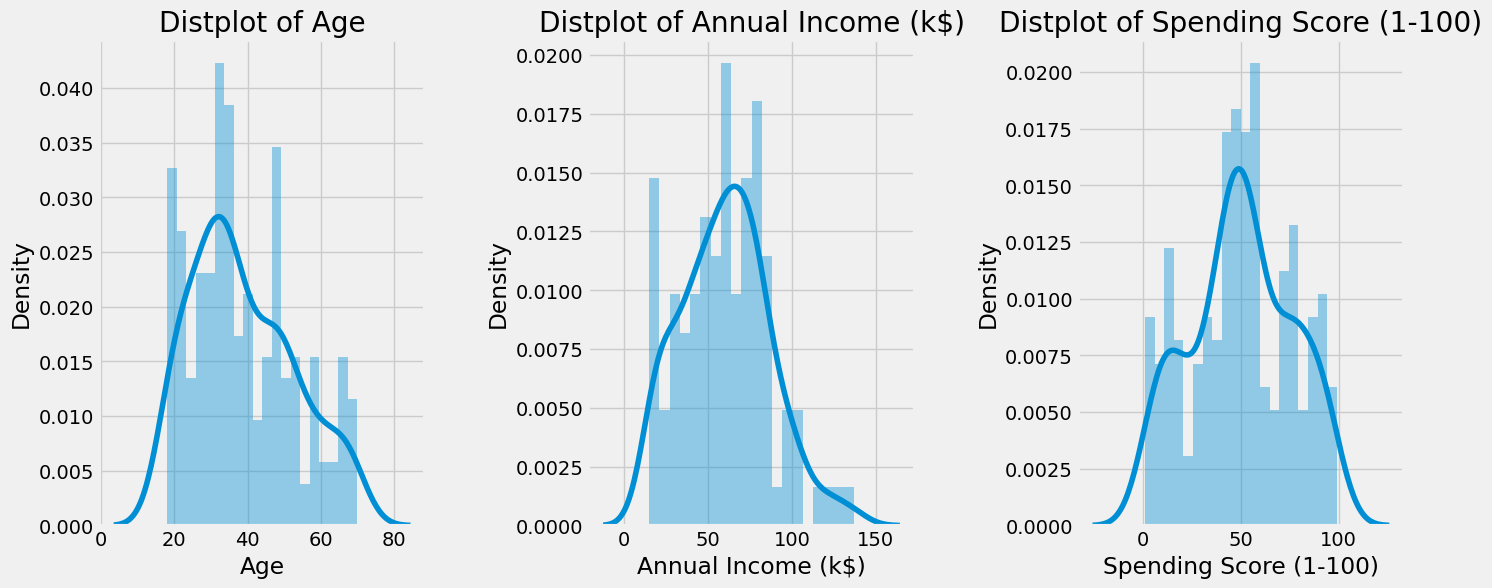

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show();


3. Thống kê số mẫu dữ liệu theo thuộc tính Giới tính.

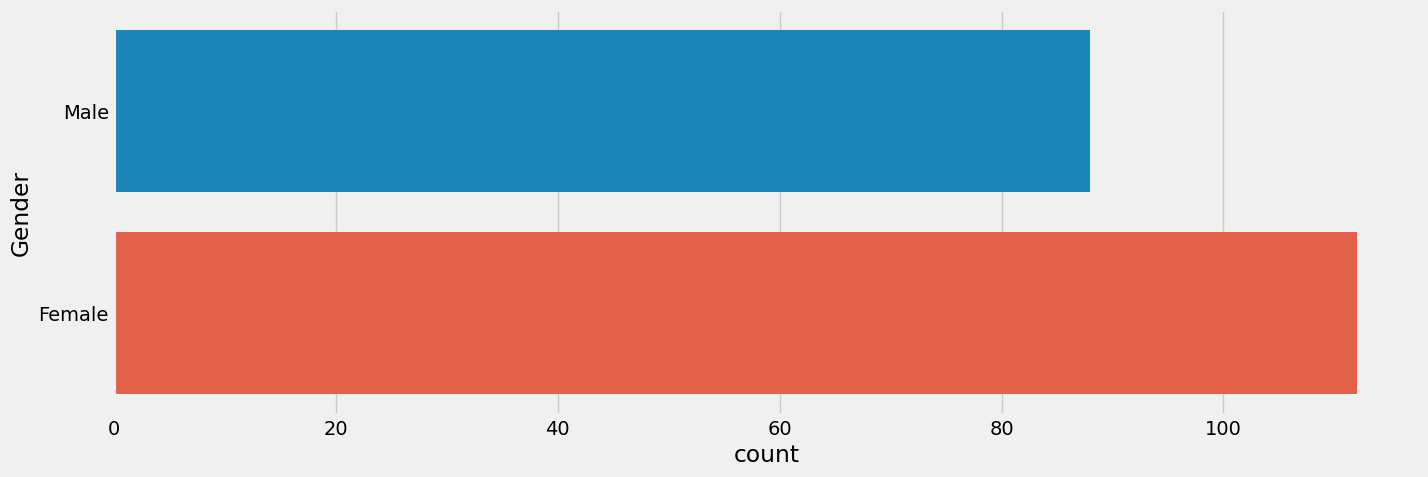

In [8]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Gender', data=data)
plt.show()

4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và
Thu nhập hằng năm theo Giới tính.

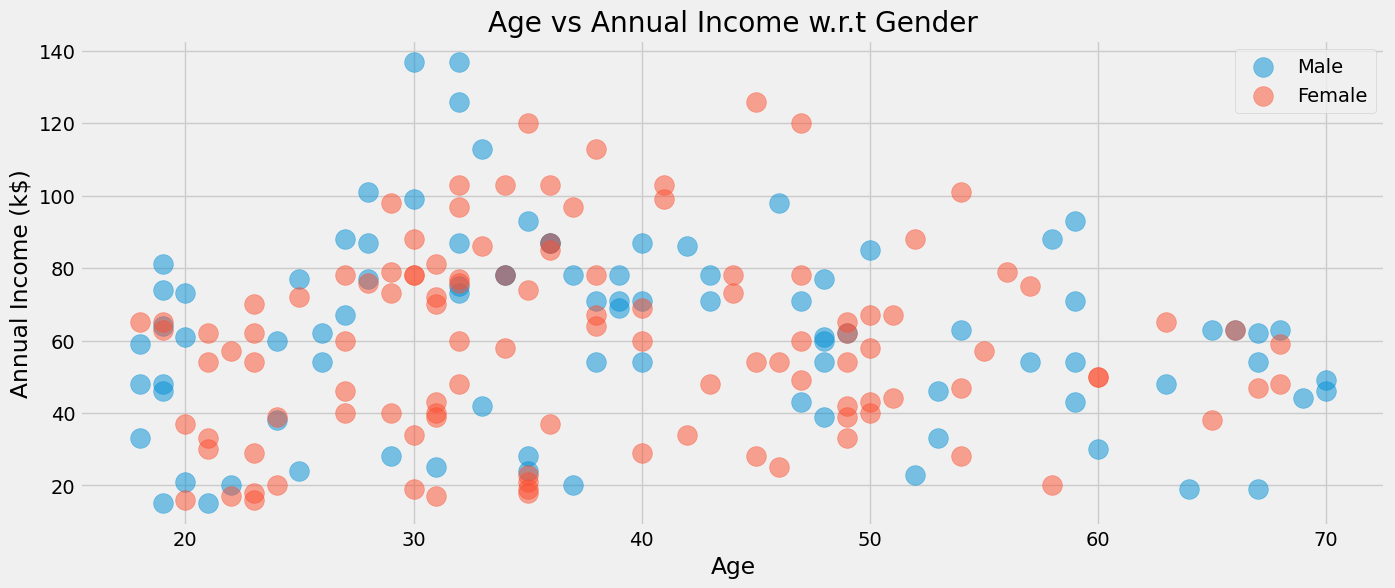

In [9]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x= 'Age',y= 'Annual Income (k$)', data=data[data['Gender'] == gender],
                s=200, alpha=0.5)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend(['Male', 'Female'])
plt.show()

5. Tương tự câu 4, khảo sát thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo
Giới tính.

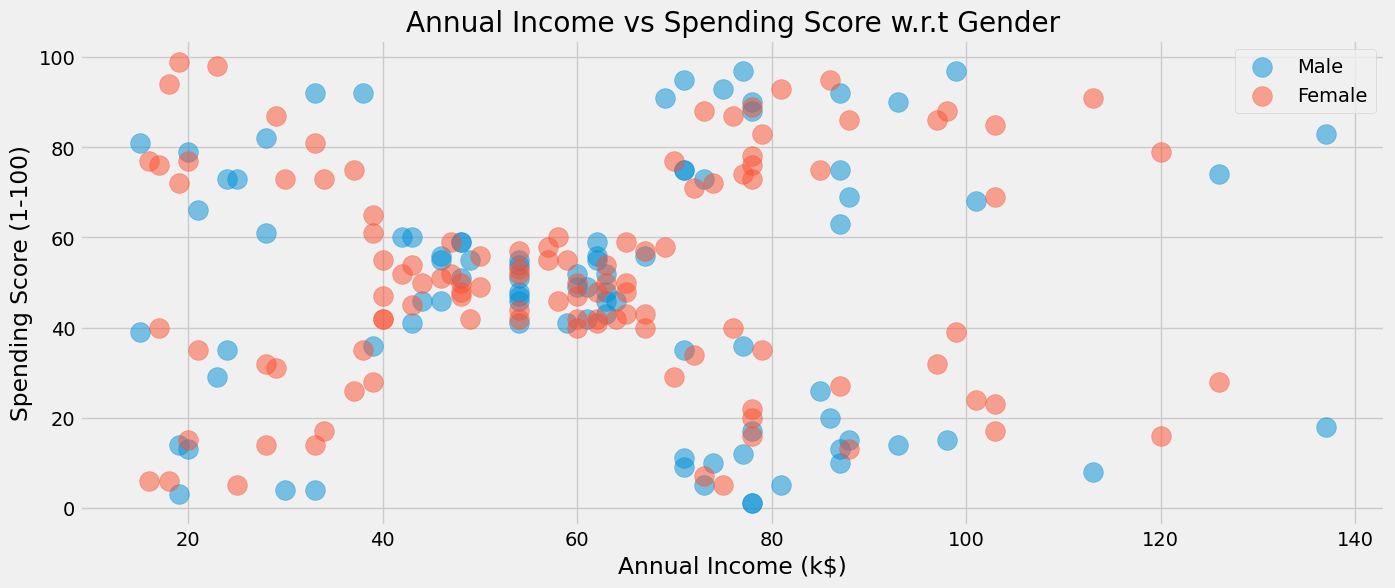

In [10]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x= 'Annual Income (k$)',y= 'Spending Score (1-100)', data=data[data['Gender'] == gender],
                s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend(['Male', 'Female'])
plt.show()

6. Chọn thuộc tính Tuổi và Số điểm mua sắm để gom cụm. Sử dụng phương pháp khuỷu
tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật
toán k-Means với số cụm vừa xác định

In [11]:
X1 = data[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

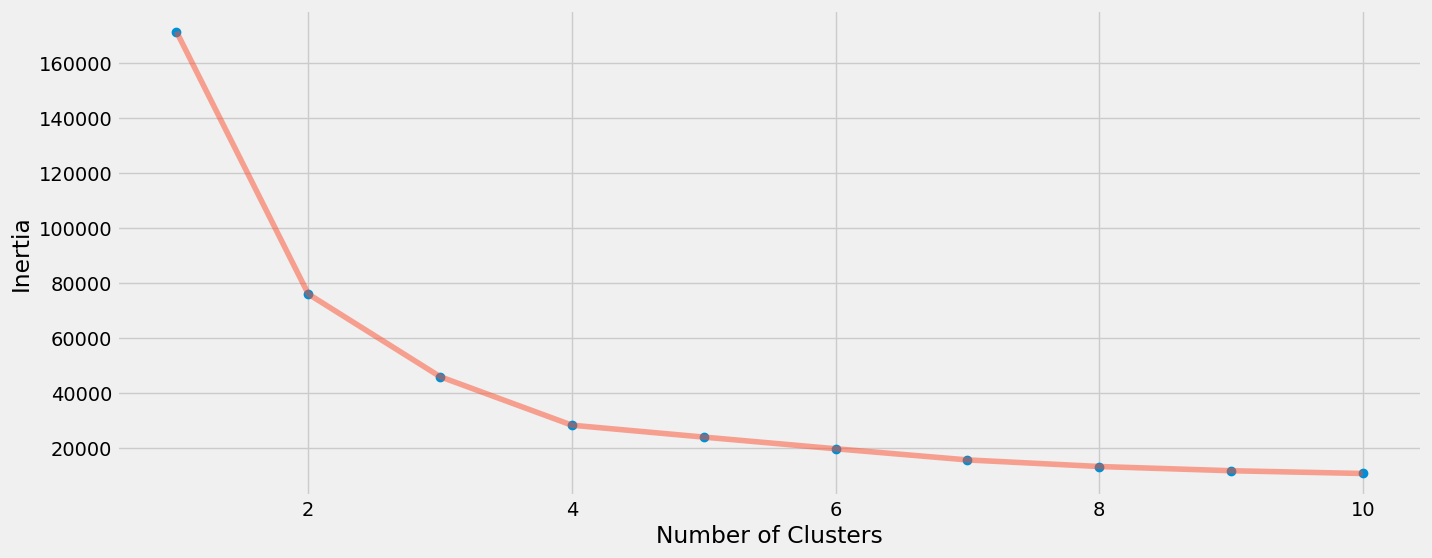

In [12]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7. Biểu diễn kết quả gom cụm trên bằng biểu đồ.

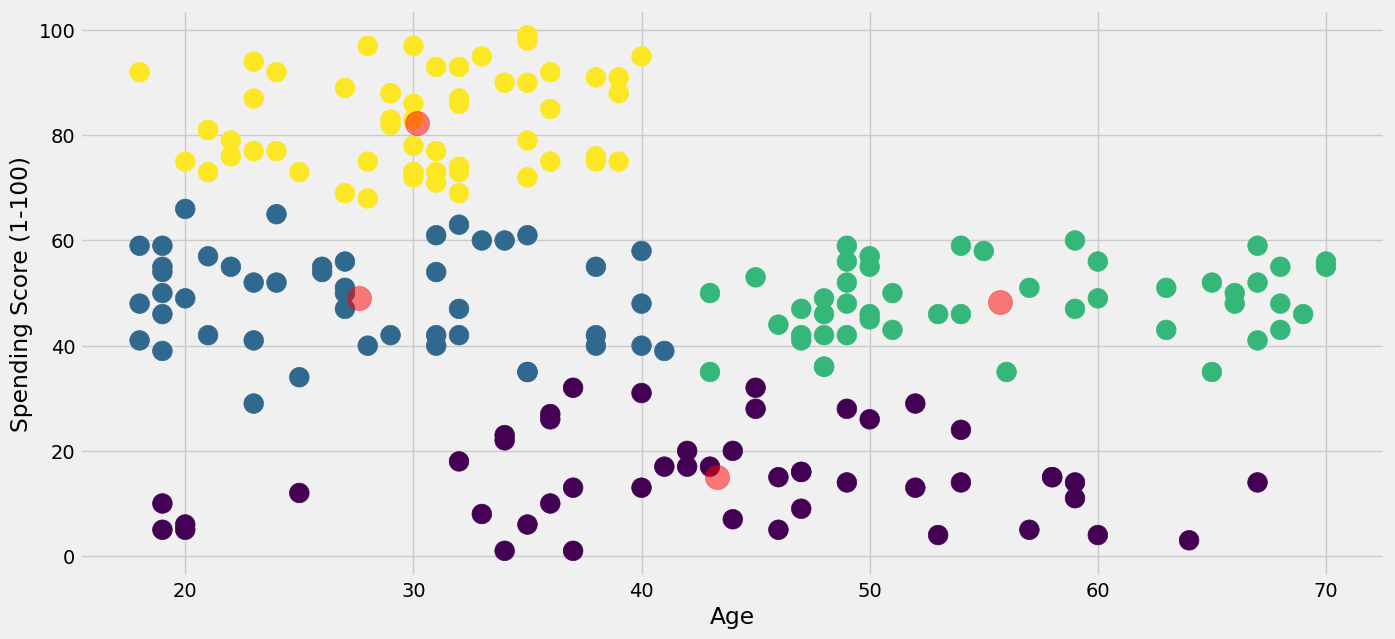

In [14]:
plt.figure(1, figsize=(15,7))
plt.clf()
plt.scatter(x= 'Age',y= 'Spending Score (1-100)', data=data, c = labels1, s=200)
plt.scatter(x= centroids1[:,0], y= centroids1[:,1], c ='red', s=300, alpha=0.5)
plt.xlabel('Age'), 
plt.ylabel('Spending Score (1-100)')
plt.show()

8. Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient).

In [15]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753

9. Thực hiện tương tự câu 6-8 với trường hợp gom cụm theo các thuộc tính:

- Thu nhập hằng năm và Số điểm mua sắm.

- Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu

- Thu nhập hằng năm và Số điểm mua sắm.

In [16]:
X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

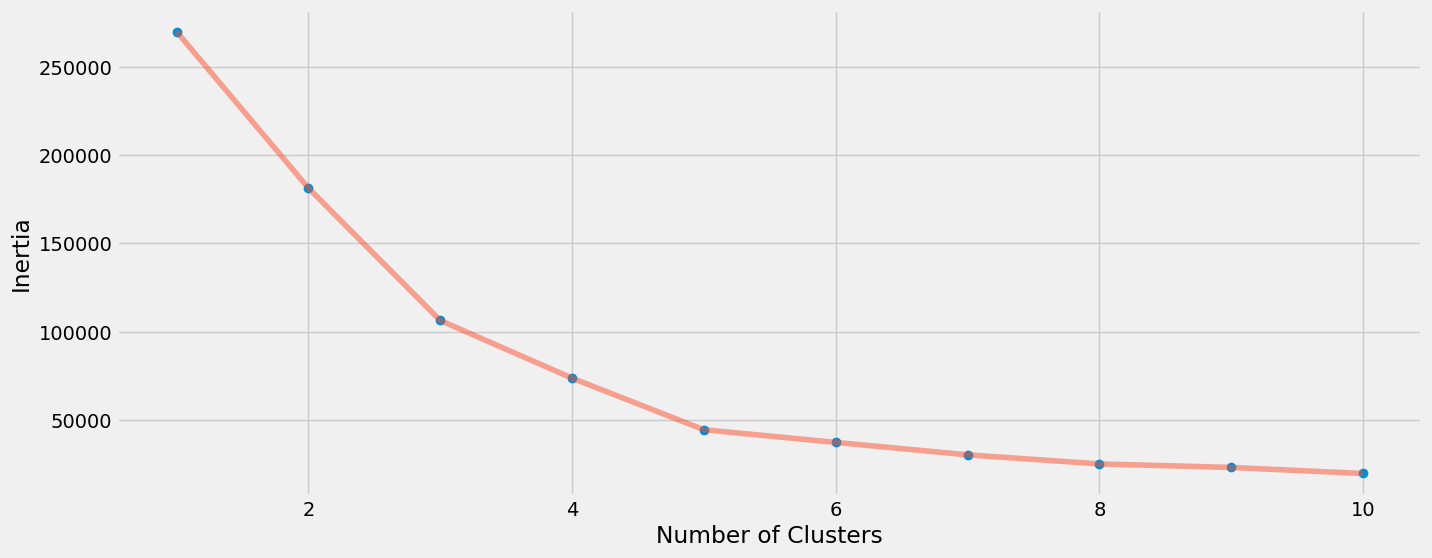

In [17]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [18]:
algorithm = KMeans(n_clusters=5, init='random')
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


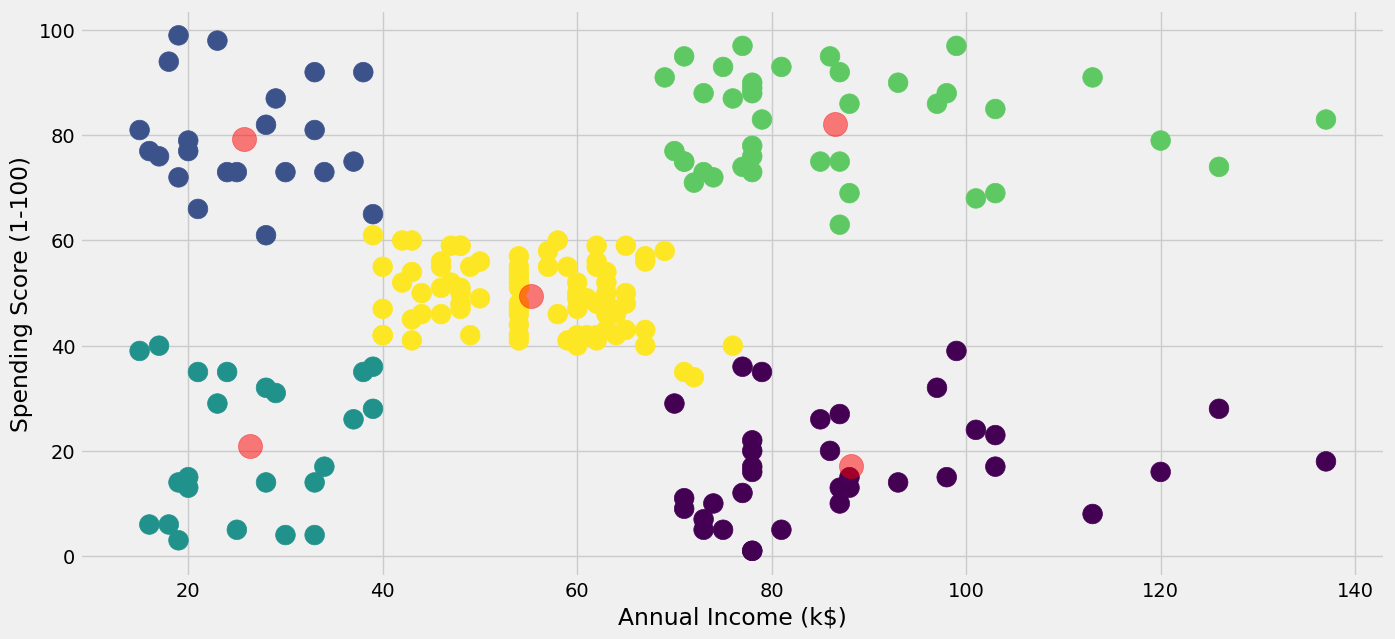

In [19]:
plt.figure(1, figsize=(15,7))
plt.clf()
plt.scatter(x= 'Annual Income (k$)',y= 'Spending Score (1-100)', data=data, c = labels2, s=200)
plt.scatter(x= centroids2[:,0],y= centroids2[:,1], c = 'red', s=300, alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.show()

In [20]:
metrics.silhouette_score(X2, labels2, metric='euclidean')

0.553931997444648

- Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu

In [21]:
X3 = data[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
# X3

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

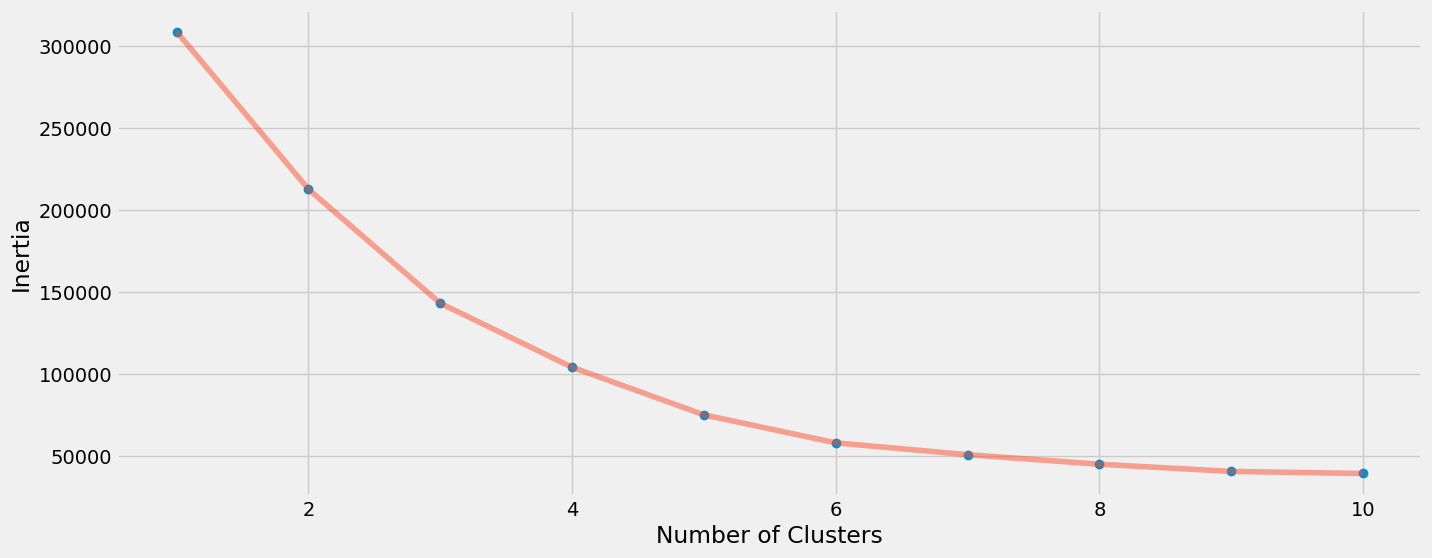

In [22]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
algorithm = KMeans(n_clusters=5, init='random')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
metrics.silhouette_score(X3, labels3, metric='euclidean')

0.44446409171786105

Thực hiện vẽ biểu đồ 3D, biểu diễn kết quả gom cụm Tuổi, Thu nhập hàng năm và Số điểm mua sắm.

In [25]:
data['label3'] = labels3
trace1 = go.Scatter3d(
    x=data['Age'],
    y=data['Spending Score (1-100)'],
    z=data['Annual Income (k$)'],
    mode='markers',
    marker=dict(color = data['label3'], size=20, line = dict(color = data['label3'],width = 12),opacity=0.8))
dat = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=dat, layout=layout)
fig
# py.offline.iplot(fig)